## Imports

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

## Data Loading

In [93]:
data = pd.read_csv('data/advertising_ef.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [95]:
data.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [96]:
data.rename(columns = {'Daily Time Spent on Site':'Daily_Spent_on_Site'}, inplace = True)

### Visualising numerical data

<AxesSubplot: xlabel='Daily Internet Usage', ylabel='Count'>

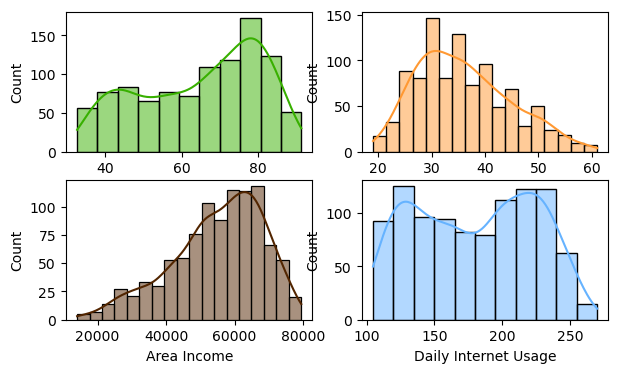

In [97]:
fig, axs = plt.subplots(2, 2, figsize=(7,4))
axs = axs.flatten()
sns.histplot(data=data, x="Daily_Spent_on_Site", kde=True,color='#38b000',ax=axs[0])
sns.histplot(data=data, x="Age", kde=True,color='#FF9933',ax=axs[1])
sns.histplot(data=data,x='Area Income',kde=True,color='#522500',ax=axs[2])
sns.histplot(data=data,x='Daily Internet Usage',kde=True,color='#66b3ff',ax=axs[3])


### Filling Nan values

In [98]:
data['Daily_Spent_on_Site'].fillna(data['Daily_Spent_on_Site'].median(),inplace = True)
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Area Income'].fillna(data['Area Income'].mean(),inplace=True)
data["Area Income"] = np.around(data['Area Income'], decimals = 2)
data['Daily Internet Usage'].fillna(data['Daily Internet Usage'].mean(),inplace=True)
data['City'].fillna(data['City'].value_counts().index[0],inplace=True)
data['Country'].fillna(data['Country'].value_counts().index[0],inplace=True)
data.isna().sum()

Daily_Spent_on_Site     0
Age                     0
Area Income             0
Daily Internet Usage    0
Ad Topic Line           0
City                    0
Gender                  0
Country                 0
Timestamp               0
Clicked on Ad           0
dtype: int64

<AxesSubplot: xlabel='Clicked on Ad', ylabel='count'>

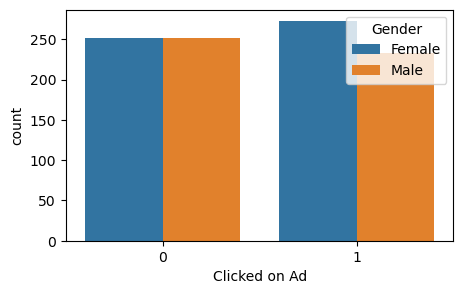

In [99]:
## analysing how many clicks based on gender 
plt.figure(figsize=(5,3))
sns.countplot(x='Clicked on Ad',data=data,hue='Gender')
## Female clicks on ads slightly more than males

<AxesSubplot: >

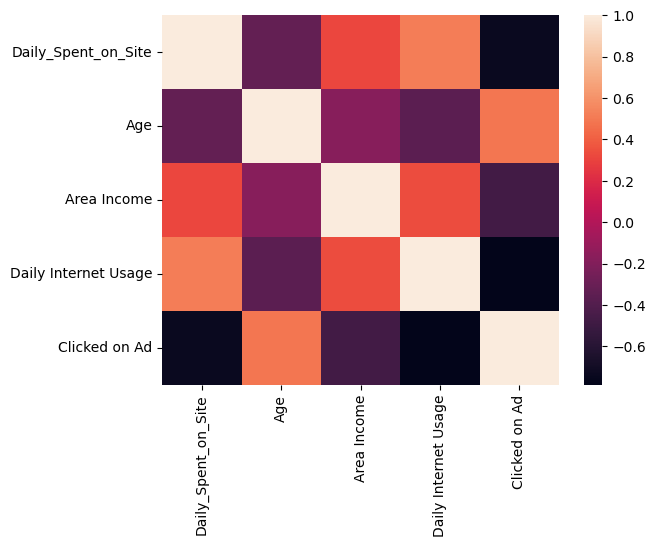

In [100]:
sns.heatmap(data.corr())

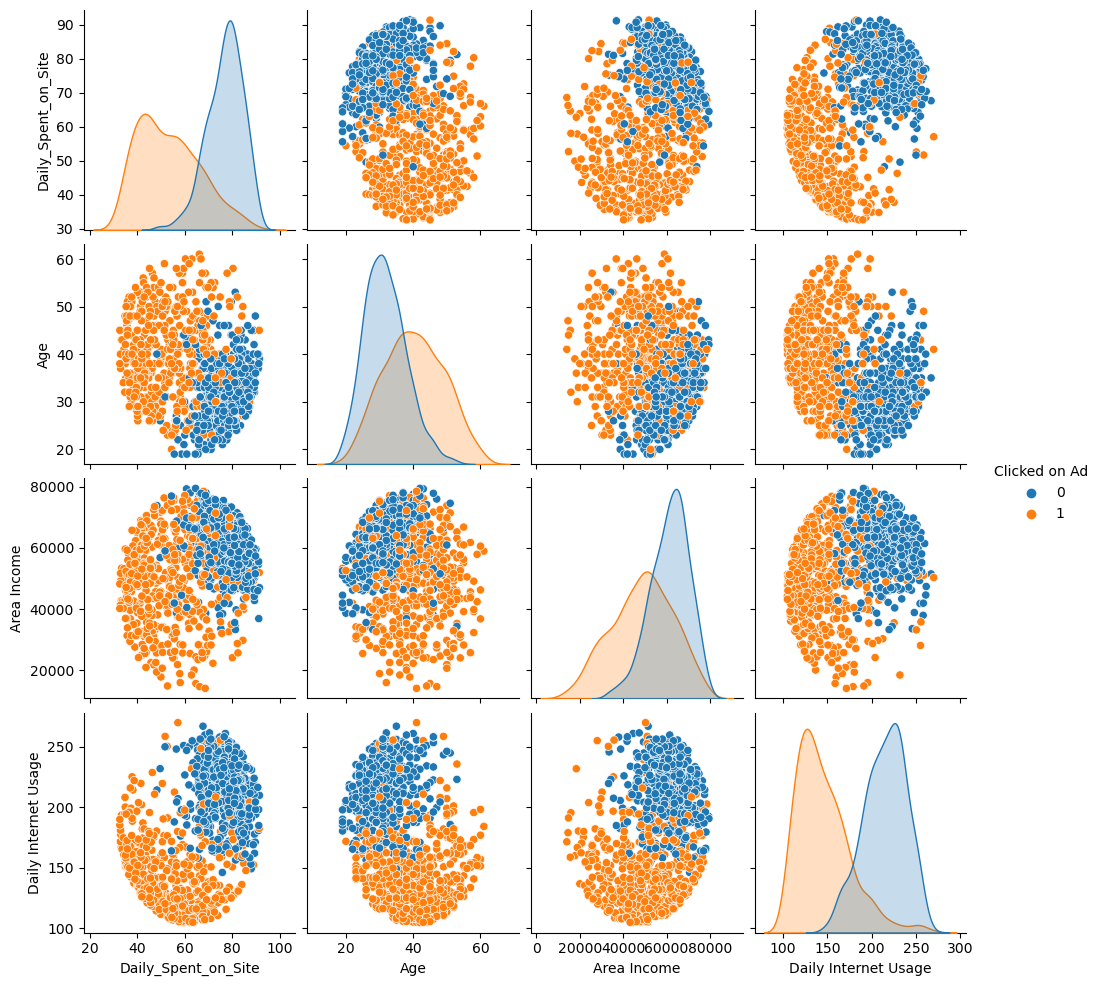

In [101]:
sns.pairplot(data,hue = 'Clicked on Ad')

In [102]:
#Unique numbers
object_Dtype = ['Ad Topic Line','City','Country']
data[object_Dtype].describe(include = ['O'])

,Ad Topic Line,City,Country
count,1009,1009,1009
unique,1000,961,237
top,Proactive non-volatile encryption,Williamsport,Czech Republic
freq,2,14,22


In [103]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'],axis = 1)

Text(0.5, 1.0, 'Ad clicked by hour')

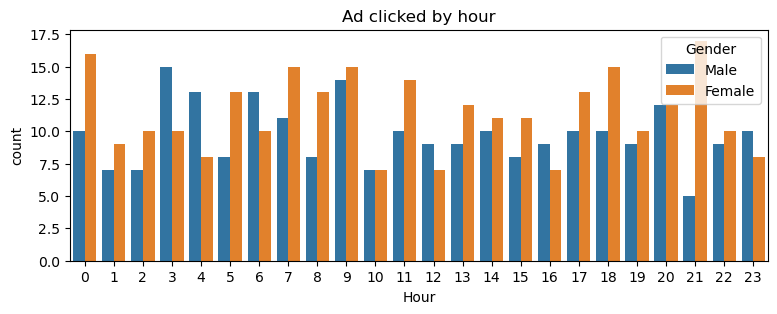

In [104]:
#When do people click the most on ads ? 
plt.figure(figsize=(9,3))
sns.countplot(x='Hour',data=data[data['Clicked on Ad']==1],hue='Gender')
plt.title('Ad clicked by hour')

Text(0.5, 1.0, 'Ad clicked by month')

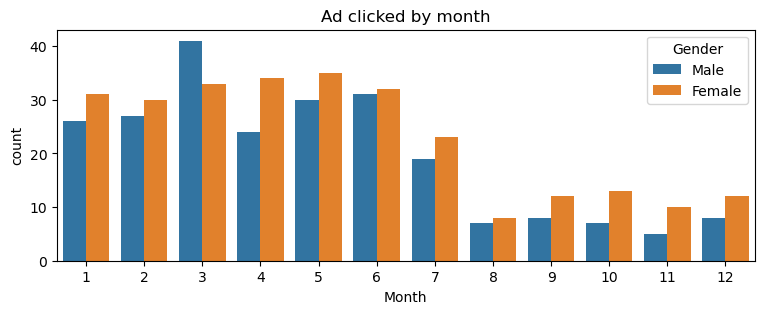

In [105]:
#When do people click the most on ads ? 
plt.figure(figsize=(9,3))
sns.countplot(x='Month',data=data[data['Clicked on Ad']==1],hue='Gender')
plt.title('Ad clicked by month')

In [106]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [107]:
data.head()

,Daily_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,1
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,20
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,2
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,3


<AxesSubplot: >

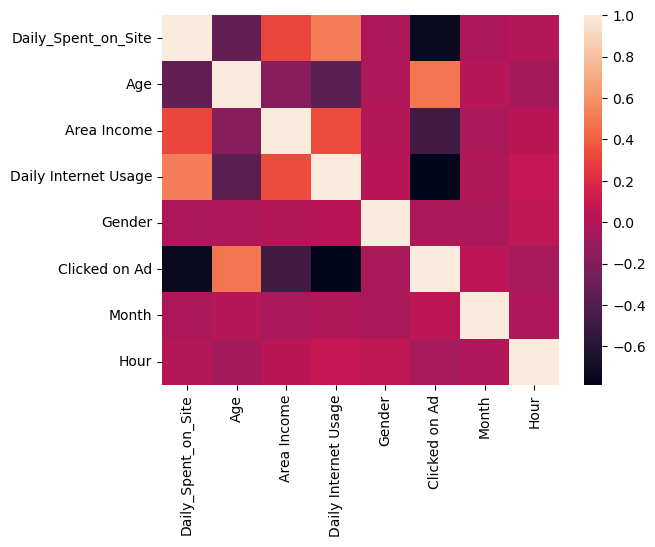

In [108]:
sns.heatmap(data.corr())


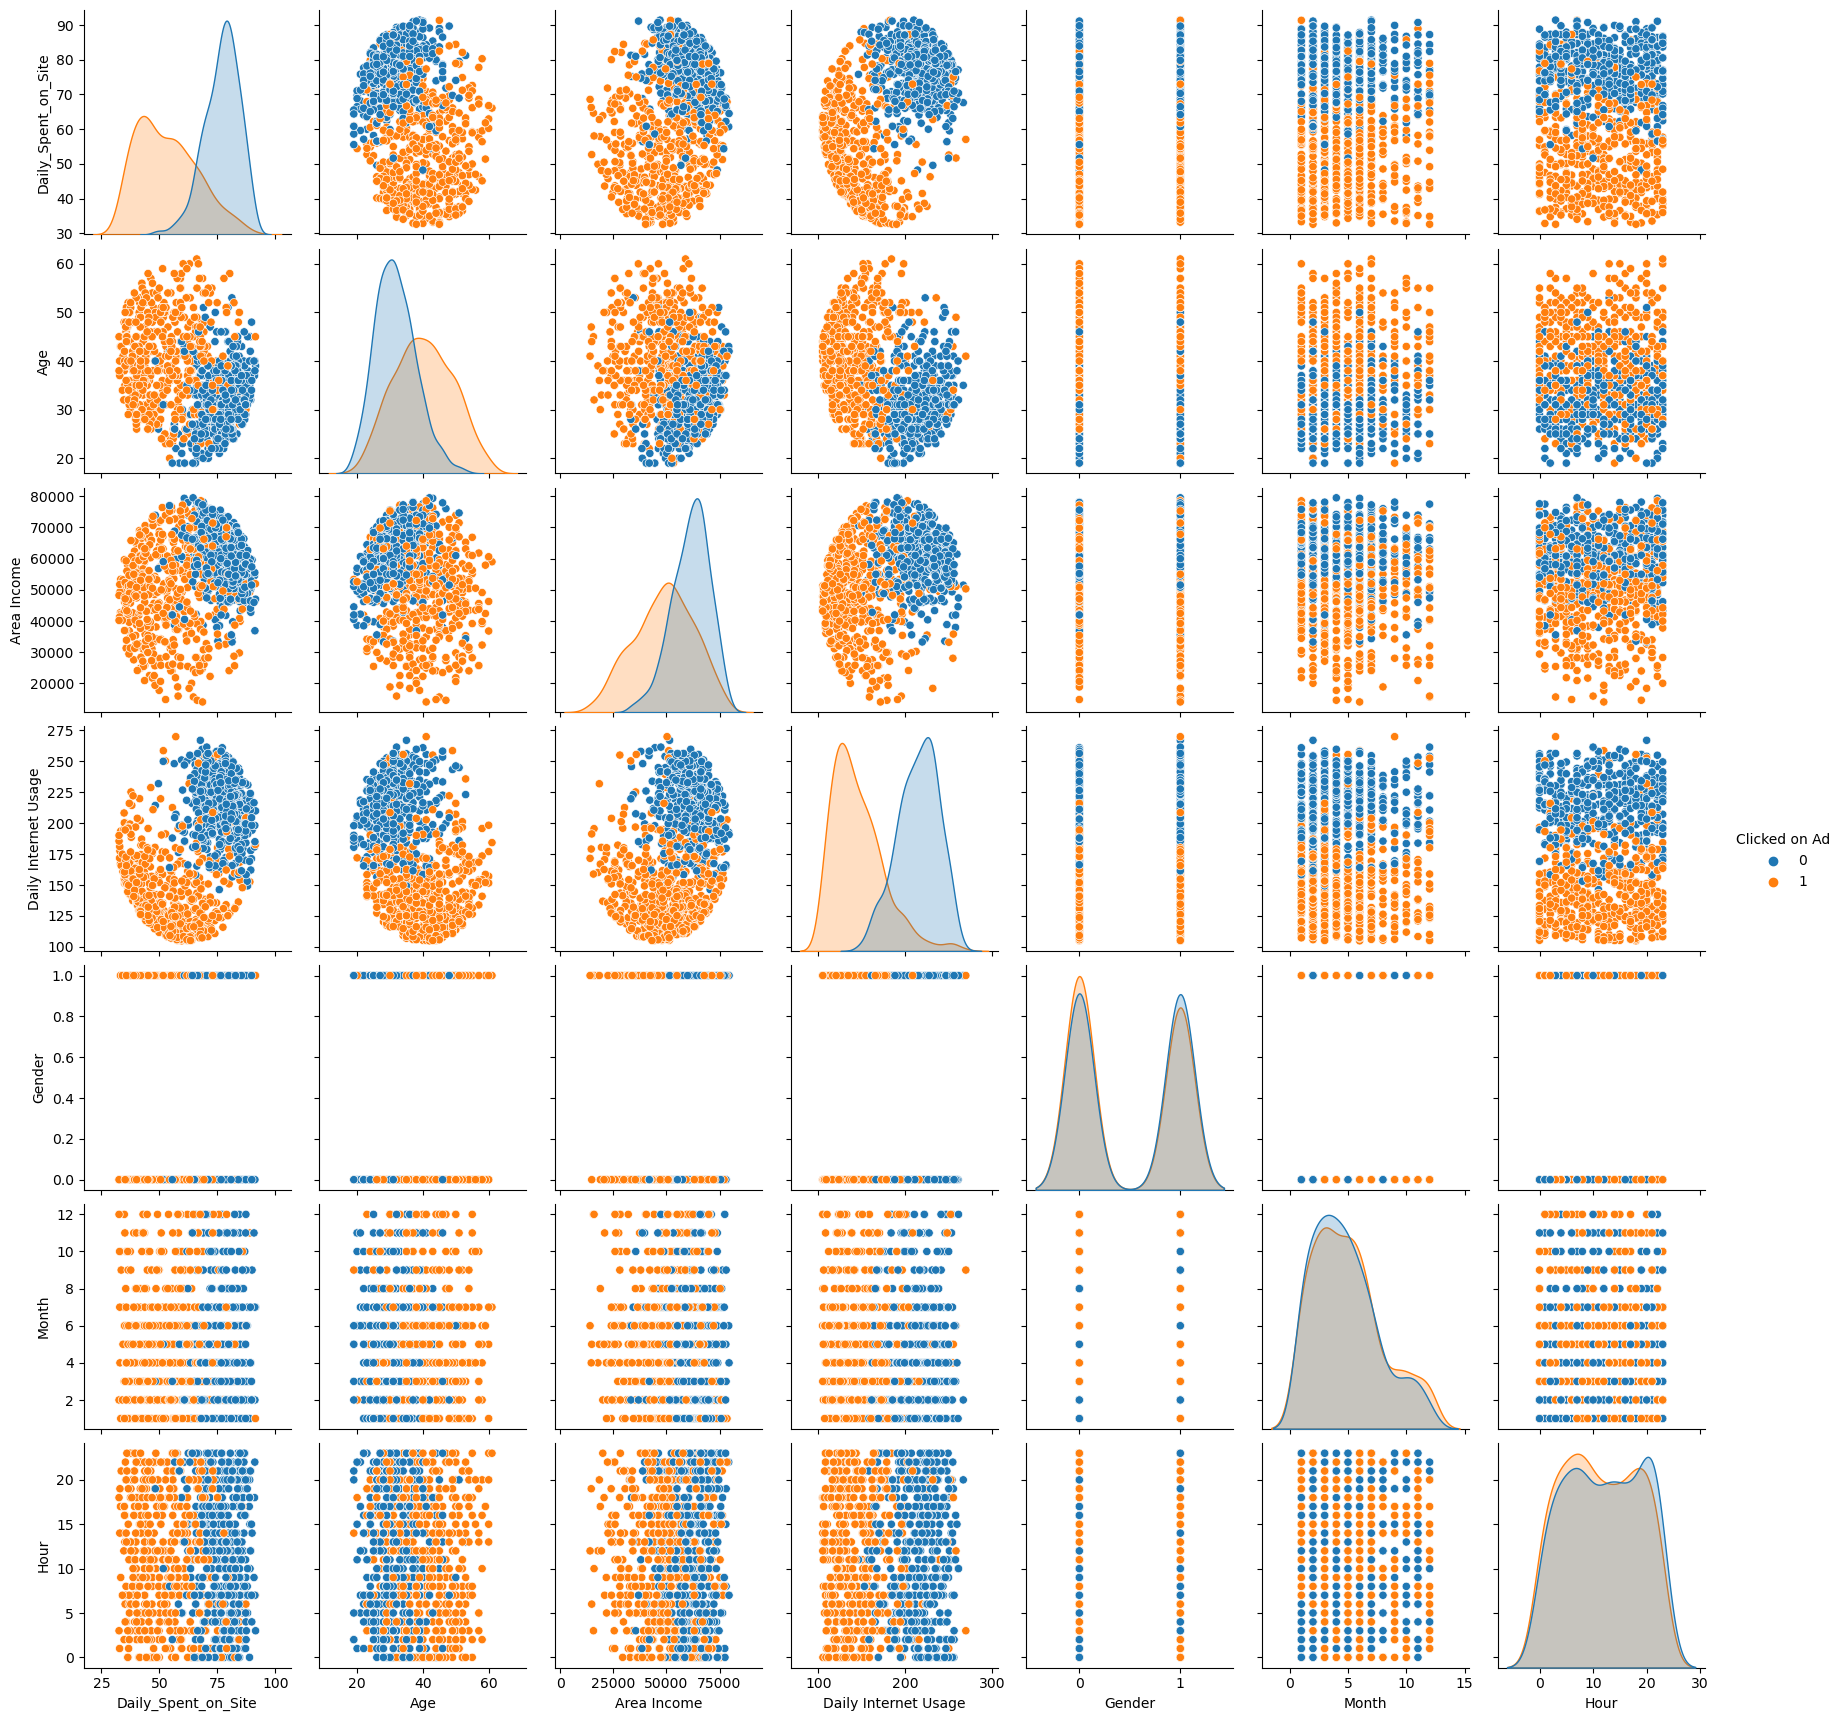

In [109]:
sns.pairplot(data, hue = 'Clicked on Ad')

we can already see the features that can help us with our prediction which are the daily time spent on site and daily internet usage as well as the area income 

In [110]:
data.dtypes

Daily_Spent_on_Site     float64
Age                     float64
Area Income             float64
Daily Internet Usage    float64
Ad Topic Line            object
City                     object
Gender                    int32
Country                  object
Clicked on Ad             int64
Month                     int64
Hour                      int64
dtype: object

In [111]:
# Make a copy of the data
data_encoded = data.copy()

# Select the categorical columns to encode
cat_columns = ['Ad Topic Line', 'City', 'Country']

# Use the get_dummies function to one-hot encode the categorical columns
data_encoded = pd.get_dummies(data_encoded, columns=cat_columns)

In [112]:
data_encoded

,Daily_Spent_on_Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Hour,Ad Topic Line_Adaptive 24hour Graphic Interface,Ad Topic Line_Adaptive asynchronous attitude,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,35.0,61833.90,256.09,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,68.37,31.0,68441.85,193.77,1,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26.0,59785.94,236.50,0,0,3,20,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29.0,54806.18,245.89,1,0,10,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35.0,73889.99,225.58,0,0,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,1,1,11,21,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,51.30,45.0,67782.17,134.42,1,1,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1006,51.63,51.0,42415.72,120.37,1,1,1,17,0,0,...,0,0,0,0,0,0,0,0,0,0
1007,55.55,19.0,41920.79,187.95,0,0,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
data.columns

Index(['Daily_Spent_on_Site', 'Age', 'Area Income', 'Daily Internet Usage',
       'Ad Topic Line', 'City', 'Gender', 'Country', 'Clicked on Ad', 'Month',
       'Hour'],
      dtype='object')

## Classification

### Linear classifier


runnin a logistic regression on the numerical column just to have first results we will go back to the categorical ones for example 
for the title of the add we can have a general context instead of treatin each title individually 

In [126]:
X= data[['Daily_Spent_on_Site', 'Age', 'Area Income', 'Daily Internet Usage','Gender', 'Month','Hour']]

y= data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

c:\Users\Akharaze\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Akharaze\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


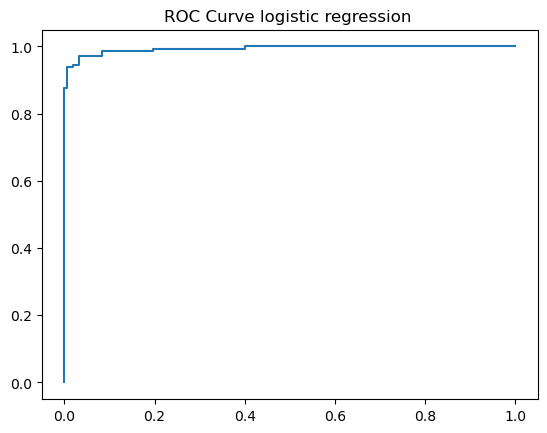

AUC :  0.9933688159846435
Accuracy of the classifier : 0.9570957095709571


In [128]:
lr=LogisticRegression(penalty='l1',solver= 'liblinear')
lr.fit(X_train, y_train)
proba_1 = lr.predict_proba(X_test)[:,1]
Fp, Tp, _ = roc_curve(y_test,proba_1)
auc_lr=roc_auc_score(y_test, lr.predict_proba(X_test_sc)[:, 1])
accuracy_lr=lr.score(X_test_sc, y_test)
plt.plot(Fp,Tp)
plt.title("ROC Curve logistic regression ")
plt.show()
print('AUC : ' , roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))
print('Accuracy of the classifier :' , lr.score(X_test, y_test))

AUC :  0.991143879242649
Accuracy of the classifier : 0.9636963696369637


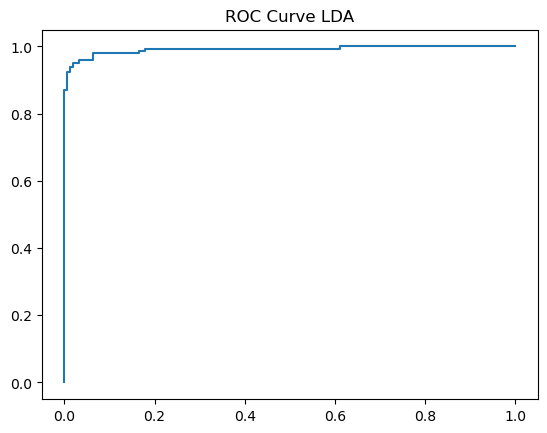

In [129]:
Lda = LinearDiscriminantAnalysis()
Lda.fit(X_train_sc, y_train)
proba_1 = Lda.predict_proba(X_test_sc)[:,1]
auc_lda=roc_auc_score(y_test, Lda.predict_proba(X_test_sc)[:, 1])
accuracy_lda=Lda.score(X_test_sc, y_test)
print('AUC : ' , roc_auc_score(y_test, Lda.predict_proba(X_test_sc)[:, 1]))
print('Accuracy of the classifier :' , Lda.score(X_test_sc, y_test))
Fp, Tp, _ = roc_curve(y_test,proba_1)
plt.plot(Fp,Tp)
plt.title("ROC Curve LDA")
plt.show()

Text(0.5, 1.0, 'LR coefficients')

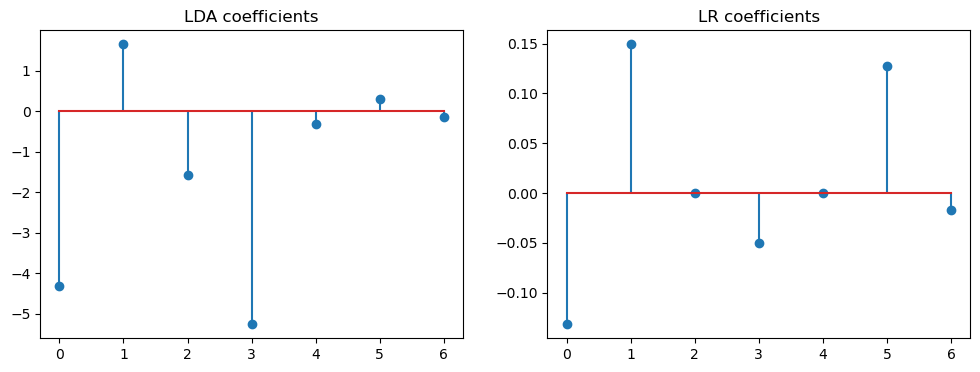

In [130]:
coeffs_lr=lr.coef_[0]
coeffs_lda=Lda.coef_[0]
plt.figure(11 ,figsize = (12,4))
plt.subplot(1,2,1)
plt.stem(coeffs_lda)
plt.title('LDA coefficients')
plt.subplot(1,2,2)
plt.stem(coeffs_lr)
plt.title('LR coefficients')

### Non linear classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

c:\Users\Akharaze\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


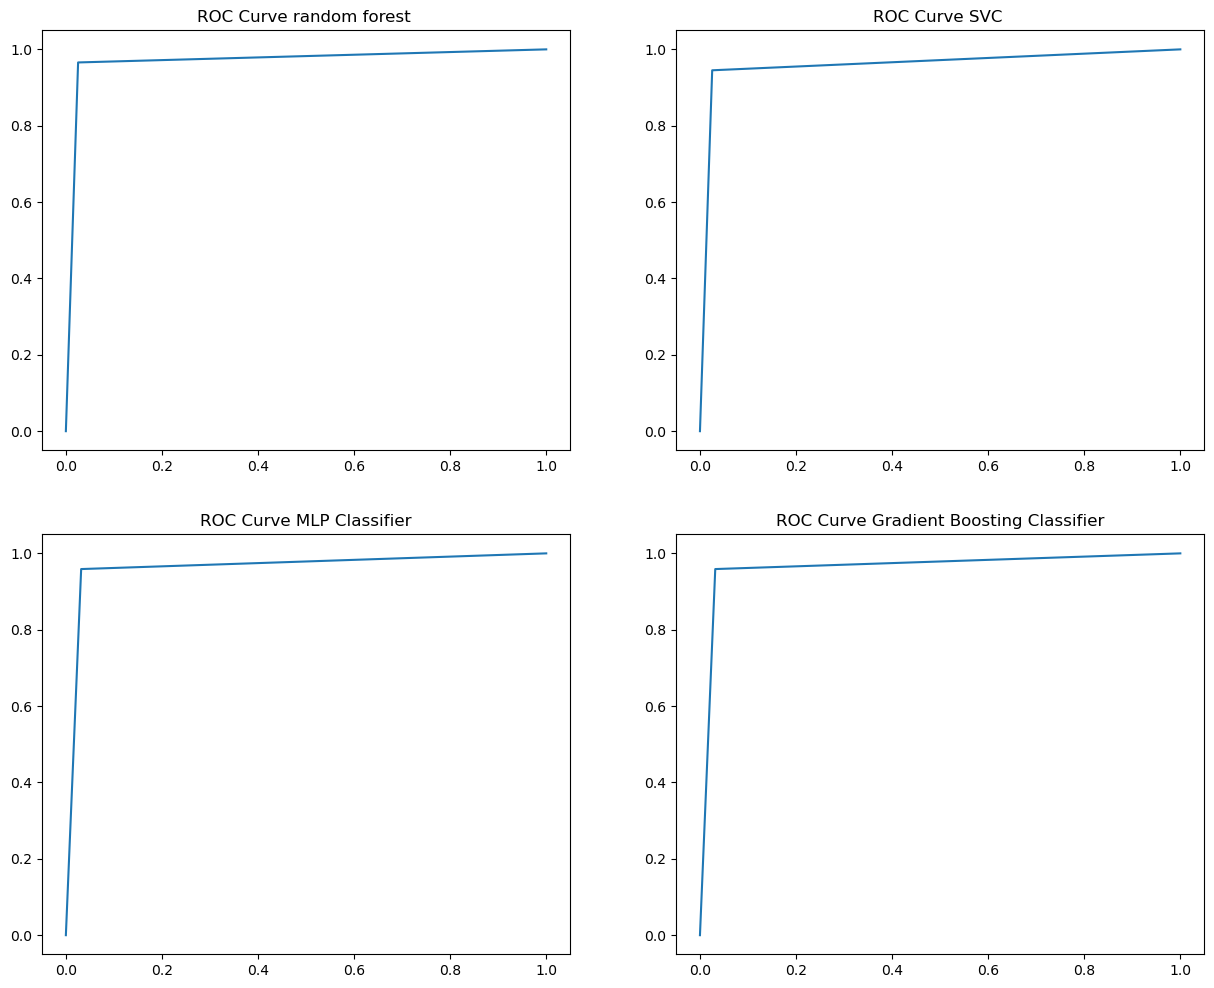

AUC Random forest :  0.9701378588255825
Accuracy of Random forest : 0.9702970297029703
AUC SVC classifier :  0.9598638862228427
Accuracy of the SVC classifier : 0.9603960396039604
AUC MLP classifier :  0.9635284879155396
Accuracy of the MLP classifier : 0.9636963696369637
AUC Gradient Boosting classifier :  0.9635284879155396
Accuracy of Gradient Boosting classifier : 0.9636963696369637


In [132]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)
y_pred_rf=rf.predict(X_test_sc)
Fp, Tp, _ = roc_curve(y_test,y_pred_rf)
axs[0,0].plot(Fp,Tp)
axs[0,0].set_title("ROC Curve random forest ")


svc = SVC()
svc.fit(X_train_sc, y_train)
y_pred_svc=svc.predict(X_test_sc)
Fp, Tp, _ = roc_curve(y_test,y_pred_svc)
axs[0,1].plot(Fp,Tp)
axs[0,1].set_title("ROC Curve SVC ")


mlp = MLPClassifier()
mlp.fit(X_train_sc, y_train)
y_pred_mlp=mlp.predict(X_test_sc)
Fp, Tp, _ = roc_curve(y_test,y_pred_mlp)
axs[1,0].plot(Fp,Tp)
axs[1,0].set_title("ROC Curve MLP Classifier")


gb = GradientBoostingClassifier()
gb.fit(X_train_sc, y_train)
y_pred_gb=gb.predict(X_test_sc)
Fp, Tp, _ = roc_curve(y_test,y_pred_gb)
axs[1,1].plot(Fp,Tp)
axs[1,1].set_title("ROC Curve Gradient Boosting Classifier")
plt.show()

print('AUC Random forest : ' , roc_auc_score(y_test, y_pred_rf))
print('Accuracy of Random forest :' , rf.score(X_test_sc, y_test))

print('AUC SVC classifier : ' , roc_auc_score(y_test, y_pred_svc))
print('Accuracy of the SVC classifier :' , svc.score(X_test_sc, y_test))

print('AUC MLP classifier : ' , roc_auc_score(y_test, y_pred_mlp))
print('Accuracy of the MLP classifier :' , mlp.score(X_test_sc, y_test))

print('AUC Gradient Boosting classifier : ' , roc_auc_score(y_test, y_pred_gb))
print('Accuracy of Gradient Boosting classifier :' , gb.score(X_test_sc, y_test))
auc_rf=roc_auc_score(y_test, y_pred_rf)
auc_svc=roc_auc_score(y_test, y_pred_svc)
auc_mlp=roc_auc_score(y_test, y_pred_mlp)
auc_gb= roc_auc_score(y_test, y_pred_gb)

accuracy_rf= rf.score(X_test_sc, y_test)
accuracy_svc= svc.score(X_test_sc, y_test)
accuracy_mlp= mlp.score(X_test_sc, y_test)
accuracy_gb= gb.score(X_test_sc, y_test)

In [133]:
#test performances for all methods
d={'AUC':[auc_lda,auc_lr,auc_rf,auc_svc,auc_mlp,auc_gb],'Accuracy' : [accuracy_lda,accuracy_lr,accuracy_rf,accuracy_svc,accuracy_mlp,accuracy_gb]}
Performance=pd.DataFrame(data=d, index=['LDA','LR','RandomForestClassifier', 'SVC', 'MLPClassifier', 'GradientBoostingClassifier'])
Performance

,AUC,Accuracy
LDA,0.991144,0.963696
LR,0.932467,0.481848
RandomForestClassifier,0.970138,0.970297
SVC,0.959864,0.960396
MLPClassifier,0.963528,0.963696
GradientBoostingClassifier,0.963528,0.963696


We can see that the linear models helped us predict better than the non linear ones This is for numerical data. We will add the categorical ones 
as well as tune the linear models to see if we can get better results.

In [27]:
data_encoded.to_csv('data/data_encoded.csv',index=False, header=True)
